# Probability distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ipywidgets import interact

## Large numbers theorem

In [6]:
experiment = stats.bernoulli(0.5).rvs(10000)

(array([4996.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5004.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

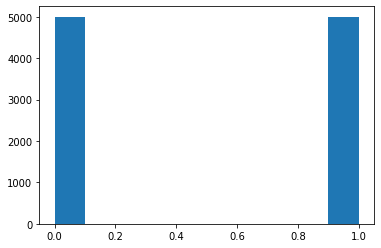

In [7]:
plt.hist(experiment)

In [8]:
np.mean(experiment)

0.5004

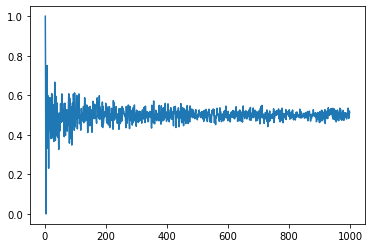

In [9]:
expectation = []
for i in range(2,1000):
    experiment = stats.bernoulli(0.5).rvs(i)
    expectation.append(np.mean(experiment))
plt.plot(range(2,1000),expectation)

(array([   21.,   271.,  1865.,  7018., 13612., 17988.,  7002.,  1894.,
          310.,    19.]),
 array([29. , 33.2, 37.4, 41.6, 45.8, 50. , 54.2, 58.4, 62.6, 66.8, 71. ]),
 <a list of 10 Patch objects>)

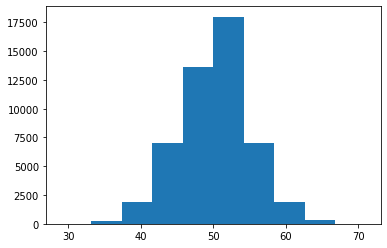

In [13]:
plt.hist(stats.binom(100, 0.5).rvs(50000))

## Central limit theorem

 What I’m about to do is creating random samples of men’s weights (imagining they range between 60 and 90 kg), each of size n=50. Then, I will run this simulation multiple times and see whether the sample means distribution resembles a Normal distribution.

In [14]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean
# seed the random number generator, so that the experiment is #replicable
seed(1)
# generate a sample of men's weights
weights = randint(60, 90, 50)
print(weights)
print('The average weight is {} kg'.format(mean(weights)))

[65 71 72 68 69 71 65 75 60 76 61 72 67 73 88 66 85 78 80 65 78 80 71 88
 70 88 89 74 78 64 83 83 69 77 83 60 82 73 69 69 67 89 82 85 61 60 88 77
 68 84]
The average weight is 74.32 kg


(array([5., 4., 5., 8., 5., 4., 5., 5., 3., 6.]),
 array([60. , 62.9, 65.8, 68.7, 71.6, 74.5, 77.4, 80.3, 83.2, 86.1, 89. ]),
 <a list of 10 Patch objects>)

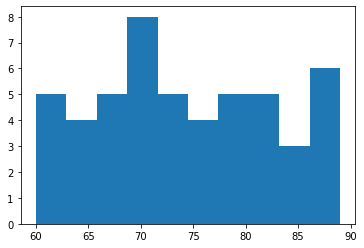

In [16]:
plt.hist(weights)

Now let’s repeat the sampling simulation for 1000 times:

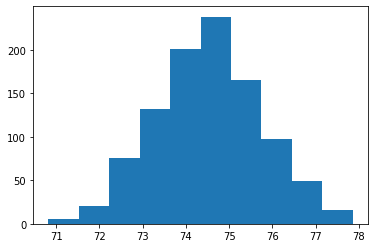

The mean of the sample means is 74.54001999999998


In [17]:
import matplotlib.pyplot as plt
# seed the random number generator, so that the experiment is replicable
seed(1)
# calculate the mean of 50 men's weights 1000 times
means = [mean(randint(60, 90, 50)) for _i in range(1000)]
# plot the distribution of sample means
plt.hist(means)
plt.show()
print('The mean of the sample means is {}'.format(mean(means)))

According to the CLT, the mean of the sample means (74.54) should be a good estimate of the real parameter (which is unknown).

## Normality testing

To be sure of our result, let’s run a normality test on our data. For this purpose, I’m going to use the Shapiro-Wilk normality test (you can read more about this test here), where the hypotheses are:

H0: data follow a Normal distribution

H1: data do not follow a Normal distribution

So if our sample means follow a normal distribution, we are going to not reject the null.

In [18]:
from scipy.stats import shapiro
stat, p = shapiro(means)
print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (do not reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Statistics=0.9982803463935852, p=0.4203375577926636
Sample looks Normal (do not reject H0)


Since the p-value is far greater than our confidence level alpha (specifically, it is greater of any significant level of alpha), we do not reject H0.

## QQ Plot

In [35]:
def pp_plot(x, dist, line=True, ax=None):
    '''
    Function for comparing empirical data to a theoretical distribution by using a P-P plot.
    
    Params:
    x - empirical data
    dist - distribution object from scipy.stats; for example scipy.stats.norm(0, 1)
    line - boolean; specify if the reference line (y=x) should be drawn on the plot
    ax - specified ax for subplots, None is standalone
    '''
    if ax is None:
        ax = plt.figure().add_subplot(1, 1, 1)
        
    n = len(x)
    p = np.arange(1, n + 1) / n - 0.5 / n
    pp = np.sort(dist.cdf(x))
    sns.scatterplot(x=p, y=pp, color='blue', edgecolor='blue', ax=ax)
    ax.set_title('PP-plot')
    ax.set_xlabel('Theoretical Probabilities')
    ax.set_ylabel('Sample Probabilities')
    ax.margins(x=0, y=0)
    
    if line: plt.plot(np.linspace(0, 1), np.linspace(0, 1), 'r', lw=2)
    
    return ax

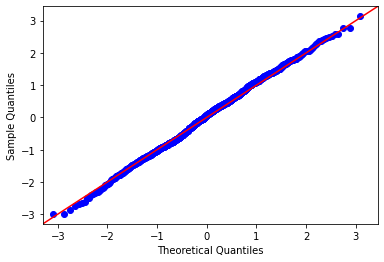

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

test = np.random.normal(0,1, 1000)

sm.qqplot(test, line='45')
plt.show()

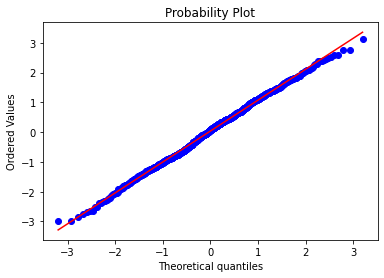

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
_= stats.probplot(test, dist="norm", plot=plt)

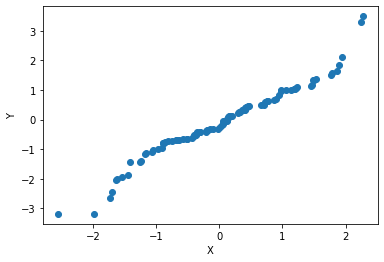

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
rng = np.random.RandomState(0)  # Seed RNG for replicability
n = 100  # Number of samples to draw

# Generate data
x = rng.normal(size=n)  # Sample 1: X ~ N(0, 1)
y = rng.standard_t(df=5, size=n)  # Sample 2: Y ~ t(5)

# Quantile-quantile plot
plt.figure()
plt.scatter(np.sort(x), np.sort(y))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.close()

## Distribution fitting

In [23]:
from scipy.stats import norm

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
samp = stats.norm.rvs(loc=0,scale=1,size=150) 

param = stats.norm.fit(samp) # distribution fitting

(array([ 3., 12., 21., 25., 31., 21., 21.,  9.,  5.,  2.]),
 array([-2.35112905, -1.8501509 , -1.34917274, -0.84819459, -0.34721644,
         0.15376171,  0.65473986,  1.15571802,  1.65669617,  2.15767432,
         2.65865247]),
 <a list of 10 Patch objects>)

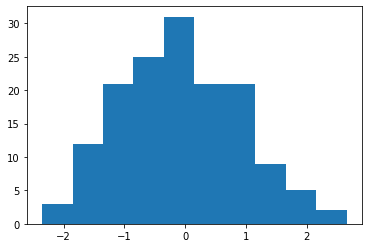

In [24]:
plt.hist(samp)

In [25]:
param

(-0.0802419967733072, 0.9547521462624434)

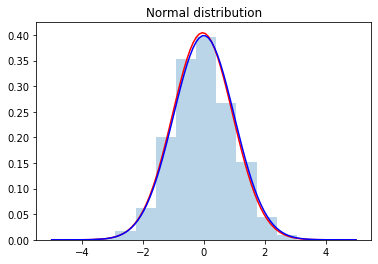

In [12]:
from scipy.stats import norm

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
samp = stats.norm.rvs(loc=0,scale=1,size=1500) 

param = stats.norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(-5,5,100)
# fitted distribution
pdf_fitted = stats.norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = stats.norm.pdf(x)

plt.title('Normal distribution')
plt.plot(x,pdf_fitted,'r-', x,pdf,'b-')
plt.hist(samp, density=True, alpha=.3)
plt.show()

In [13]:
param

(-0.04112783277988984, 0.9863711053368828)

# Real example

In [26]:
import statsmodels

data = statsmodels.datasets.heart.load_pandas().data

In [27]:
data.head()

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0


In [28]:
survival = data[data.censors == 1].survival

In [29]:
len(survival)

45

Text(0, 0.5, 'Number of patients')

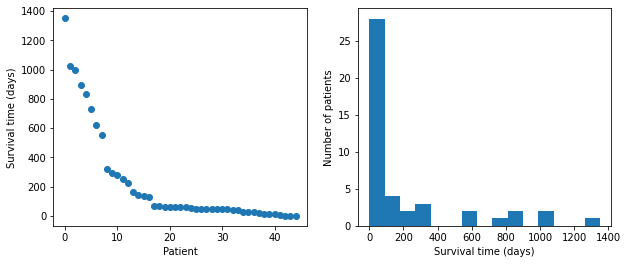

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(sorted(survival)[::-1], 'o')
ax1.set_xlabel('Patient')
ax1.set_ylabel('Survival time (days)')

ax2.hist(survival, bins=15)
ax2.set_xlabel('Survival time (days)')
ax2.set_ylabel('Number of patients')

Text(0, 0.5, 'Number of patients')

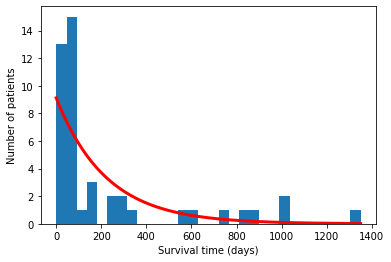

In [33]:
import math
smax = survival.max()
days = np.linspace(0., smax, 1000)
# bin size: interval between two
# consecutive values in `days`
dt = max(survival) / 999.
dist_exp = stats.expon.pdf(days, scale=222)


nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) *  max(survival) / nbins, '-r', lw=3)
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")

In [32]:
args = stats.expon.fit(survival)
args

(1.0, 222.2888888888889)

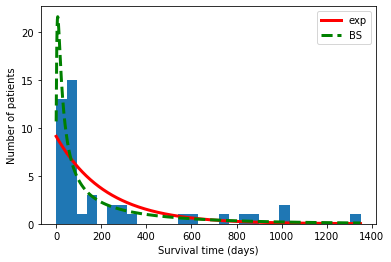

In [34]:

args = stats.fatiguelife.fit(survival)
dist_fl = dist.pdf(days, *args)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3, label='exp')
ax.plot(days, dist_fl * len(survival) * smax / nbins,
        '--g', lw=3, label='BS')
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")
ax.legend()

In [35]:
stats.kstest(survival, stats.fatiguelife.cdf, args)

KstestResult(statistic=0.1877344610194689, pvalue=0.07321149700086325)

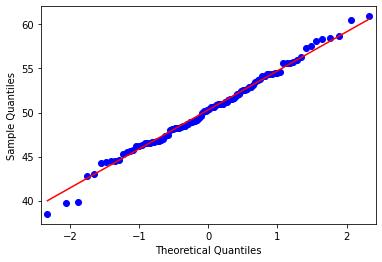

In [36]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(data, line='s')
pyplot.show()

In [37]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


In [38]:
def ks_plot_norm(data):
    length = len(data)
    plt.figure(figsize=(12, 7))
    plt.plot(np.sort(x_100), np.linspace(0, 1, len(x_100), endpoint=False))
    plt.plot(np.sort(stats.norm.rvs(loc=5, scale=3, size=100)), np.linspace(0, 1, len(x_100), endpoint=False))
    plt.legend('top right')
    plt.legend(['Data', 'Theoretical Values'])
    plt.title('Comparing CDFs for KS-Test')
    


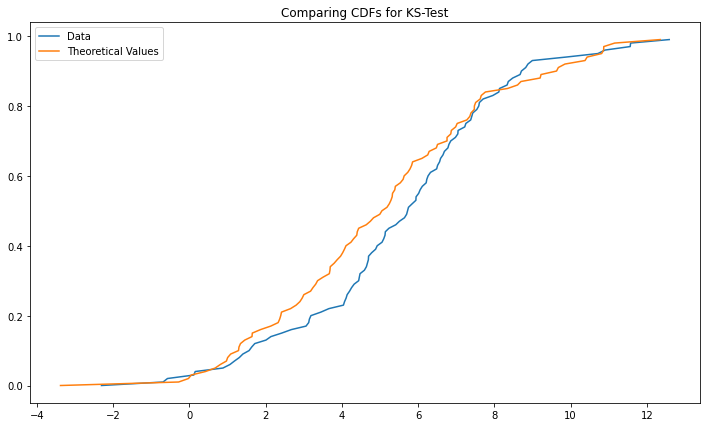

In [39]:
x_100 = stats.norm.rvs(loc=5, scale=3, size=100)
ks_plot_norm(x_100)